In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data/netflix_titles.csv


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('/kaggle/input/netflix-data/netflix_titles.csv')

In [106]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [108]:
df['listed_in'].head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [109]:
df.duplicated().sum()   
#.sum() is used bcz if we don't find any duplicate value it will show 0 or it will show false on every data

0

In [110]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [111]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [113]:
import pandas as pd

df['date_added'] = df['date_added'].astype(str)
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

print(df['date_added'].dtype)
print(df['date_added'].head()) 

datetime64[ns]
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


In [114]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [115]:
column=['director','description','release_year','listed_in']

In [116]:
df.drop(column,axis=1,inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added', 'rating',
       'duration'],
      dtype='object')

In [117]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,PG-13,90 min
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,TV-MA,1 Season
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,TV-MA,2 Seasons


In [118]:
import numpy as np
df["rating"] = np.random.randint(3, 11, df.shape[0])


In [119]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,7,90 min
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,5,2 Seasons
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,7,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,8,1 Season
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,3,2 Seasons


In [120]:
df['rating'].value_counts()

rating
9     1144
4     1135
7     1127
6     1099
5     1093
10    1089
8     1064
3     1056
Name: count, dtype: int64

In [121]:
df.dropna(inplace=True)
df.isna().sum()

show_id       0
type          0
title         0
cast          0
country       0
date_added    0
rating        0
duration      0
dtype: int64

In [122]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,5,2 Seasons
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,3,2 Seasons
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,5,125 min
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,8,9 Seasons
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,8,104 min


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7216 entries, 1 to 8806
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   show_id     7216 non-null   object        
 1   type        7216 non-null   object        
 2   title       7216 non-null   object        
 3   cast        7216 non-null   object        
 4   country     7216 non-null   object        
 5   date_added  7216 non-null   datetime64[ns]
 6   rating      7216 non-null   int64         
 7   duration    7216 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 507.4+ KB


In [124]:
df.nunique()

show_id       7216
type             2
title         7216
cast          7021
country        686
date_added    1611
rating           8
duration       205
dtype: int64

In [125]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,5,2 Seasons
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,3,2 Seasons
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,5,125 min
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,8,9 Seasons
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,8,104 min


In [126]:
sns.set_style('whitegrid')

In [127]:
df['type'].describe()

count      7216
unique        2
top       Movie
freq       5278
Name: type, dtype: object

which type has highest popularity?


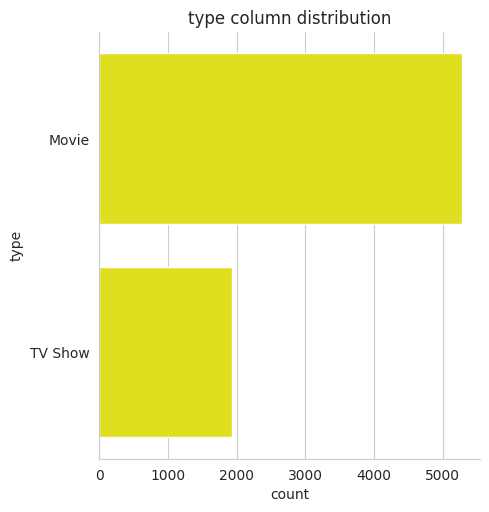

In [128]:
sns.catplot(y='type',data=df,kind='count',
           order=df['type'].value_counts().index,
           color='#FFFF00')
plt.title("type column distribution")
plt.show()

In [129]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,5,2 Seasons
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,3,2 Seasons
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,5,125 min
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,8,9 Seasons
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,8,104 min


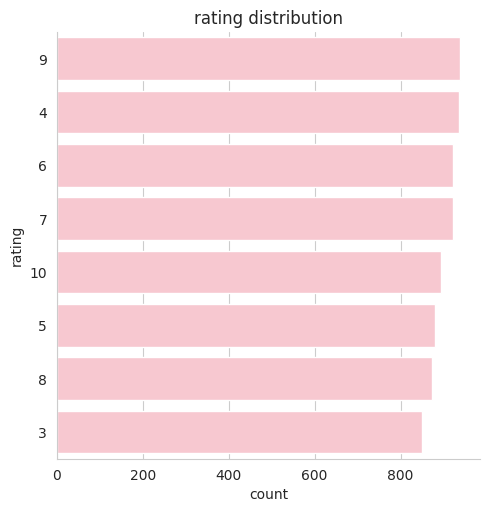

In [130]:
sns.catplot(y='rating',data=df,kind='count',
            order=df['rating'].value_counts().index,
            color='#FFC0CB')
plt.title('rating distribution')
plt.show()


In [131]:
#which movie has got highest popularity?


In [132]:
df.head()

,show_id,type,title,cast,country,date_added,rating,duration
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,5,2 Seasons
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,3,2 Seasons
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,5,125 min
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,8,9 Seasons
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,8,104 min


In [133]:
df[df['rating']==df['rating'].max()]

,show_id,type,title,cast,country,date_added,rating,duration
29,s30,Movie,Paranoia,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,10,106 min
58,s59,Movie,Naruto Shippûden the Movie: The Will of Fire,"Junko Takeuchi, Chie Nakamura, Kazuhiko Inoue,...",Japan,2021-09-15,10,96 min
62,s63,Movie,Naruto the Movie 3: Guardians of the Crescent ...,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,2021-09-15,10,95 min
84,s85,Movie,Omo Ghetto: the Saga,"Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,2021-09-10,10,147 min
99,s100,TV Show,On the Verge,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States",2021-09-07,10,1 Season
...,...,...,...,...,...,...,...,...
8774,s8775,Movie,يوم الدين,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States",2019-10-22,10,97 min
8777,s8778,Movie,Yes or No,"Sushar Manaying, Supanart Jittaleela, Arisara ...",Thailand,2018-12-06,10,111 min
8782,s8783,Movie,Yoga Hosers,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,2016-12-02,10,88 min
8784,s8785,Movie,Yoko and His Friends,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...","Russia, Spain",2018-06-23,10,78 min


#which year has the most flimmed movies?


Text(0.5, 1.0, 'DATE COLUMN DISTRIBUTION')

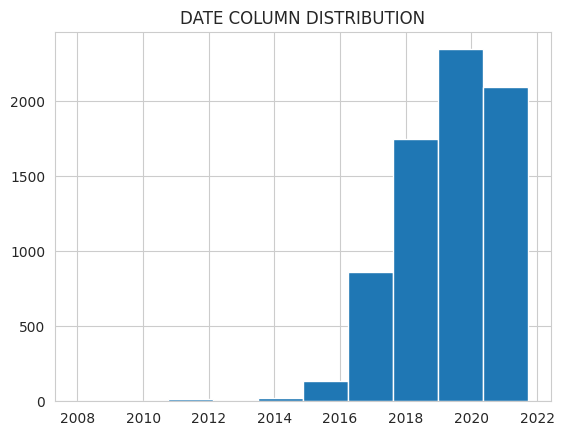

In [134]:
df['date_added'].hist()
plt.title('DATE COLUMN DISTRIBUTION')